In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
import numpy as np

import torchvision.datasets as datasets
import torchvision.transforms as transforms

from rand_conv import randConv


In [7]:
transform = transforms.Compose(
    [transforms.Resize(32),
     transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])
dataset = datasets.MNIST(root='./dataset', train=True,
                         download=True, transform=transform)

9913344it [00:05, 1749807.64it/s]                             


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



29696it [00:00, 4405250.46it/s]          

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



1649664it [00:00, 1946402.51it/s]                             


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



5120it [00:00, 3156671.54it/s]          

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [9]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=600000)
data,labels = next(iter(data_loader))
# data = data.cuda()

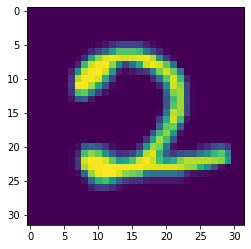

In [21]:
Z = data[labels==2]
Z = Z.reshape((5958,32**2))
Z = Z.T

d, n = Z.shape
# demonstrate data structure was preserved in reshape
im = Z[:,3292].detach().cpu().numpy().reshape(32,32)
plt.imshow(im)

array([[0.18280697, 0.18280697, 0.18280697, ..., 0.18280697, 0.18280697,
        0.18280697],
       [0.18280697, 0.18280697, 0.18280697, ..., 0.18280697, 0.18280697,
        0.18280697],
       [0.18280697, 0.18280697, 0.18280697, ..., 0.18280697, 0.18280697,
        0.18280697],
       ...,
       [0.18280697, 0.18280697, 0.18280697, ..., 0.18280697, 0.18280697,
        0.18280697],
       [0.18280697, 0.18280697, 0.18280697, ..., 0.18280697, 0.18280697,
        0.18280697],
       [0.18280697, 0.18280697, 0.18280697, ..., 0.18280697, 0.18280697,
        0.18280697]], dtype=float32)

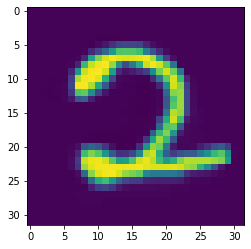

In [27]:
K = [5]
Znp = Z.cpu().detach().numpy()
Znp = randConv(Znp, K)

out = torch.from_numpy(Znp)
out_im = out[:,3292].detach().cpu().numpy().reshape(32,32)
plt.imshow(out_im)
out_im - im
